In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

ticker = yf.Ticker("PTT.BK")
info = ticker.info

print("Market Cap:", info.get("marketCap"))
print("P/E Ratio:", info.get("trailingPE"))
print("P/BV Ratio:", info.get("priceToBook"))
print("Dividend Yield (%):", info.get("dividendYield", 0) * 100)
print("EPS Growth (%):", info.get("earningsGrowth", 0) * 100)
print("Sector:", info.get("sector"))
print("Industry:", info.get("industry"))
print("Volume:", info.get("volume"))
print("Turnover (approx):", info.get("regularMarketVolume") * info.get("currentPrice", 0))


Market Cap: 913459838976
P/E Ratio: 13.1097555
P/BV Ratio: 0.81316185
Dividend Yield (%): 682.0
EPS Growth (%): -39.2
Sector: Energy
Industry: Oil & Gas Integrated
Volume: 4487410
Turnover (approx): 144718972.5


In [3]:
import yfinance as yf
import pandas as pd

In [4]:
# -------------------------------
# 1️⃣ กำหนด list หุ้น SET100 (ตัวอย่าง 5 ตัว)
# -------------------------------
set100_symbols = ["PTT.BK", "AOT.BK", "SCB.BK", "CPALL.BK", "KBANK.BK"]  # .BK = Thailand

In [5]:
# -------------------------------
# 2️⃣ ดึงข้อมูลหุ้นด้วย yfinance
# -------------------------------
all_data = []

for sym in set100_symbols:
    stock = yf.Ticker(sym)
    info = stock.info
    all_data.append({
        "Symbol": sym,
        "CompanyName": info.get("shortName"),
        "MarketCap": info.get("marketCap"),
        "PE": info.get("trailingPE"),
        "PBV": info.get("priceToBook"),
        "DividendYield": info.get("dividendYield"),
        "EPS": info.get("trailingEps"),
        "Volume": info.get("averageVolume"),
        "Sector": info.get("sector"),
        "Industry": info.get("industry")
    })


In [6]:
# -------------------------------
# 3️⃣ แปลงเป็น DataFrame + Export Excel
# -------------------------------
df = pd.DataFrame(all_data)
df.to_excel("SET100_Data_yfinance.xlsx", index=False)
print("💾 บันทึกไฟล์เรียบร้อย: SET100_Data_yfinance.xlsx")

💾 บันทึกไฟล์เรียบร้อย: SET100_Data_yfinance.xlsx


In [7]:
import yfinance as yf
import pandas as pd
from tqdm import tqdm  # แสดง progress bar


-----

-------------------------------
1️⃣ List หุ้น SET100 (ตัวอย่าง 100 ตัว .BK สำหรับ Thailand)
-------------------------------

In [8]:
set100_symbols = [
    "ADVANC.BK", "AOT.BK", "BDMS.BK", "BH.BK", "CPALL.BK", "CPAXT.BK", "CPF.BK", "CPN.BK", "DELTA.BK", "GULF.BK",
    "HMPRO.BK", "KBANK.BK", "KTB.BK", "MINT.BK", "OR.BK", "PTT.BK", "PTTEP.BK", "SCB.BK", "SCC.BK", "TRUE.BK",
    "TTB.BK", "BEM.BK", "CRC.BK", "KTC.BK", "AAV.BK", "ACAP.BK", "AEONTS.BK", "AMATA.BK", "AP.BK", "AUCT.BK",
    "BA.BK", "BANPU.BK", "BBL.BK", "BCP.BK", "BEC.BK", "BJC.BK", "BTS.BK", "BUI.BK", "BWG.BK", "CBG.BK",
    "CHG.BK", "CK.BK", "COM7.BK", "CPALL.BK", "CRC.BK", "DELTA.BK", "DIF.BK", "DOHOME.BK", "DTAC.BK", "EA.BK",
    "EGCO.BK", "EPCO.BK", "ESSO.BK", "GFPT.BK", "GLOBAL.BK", "GPSC.BK", "GULF.BK", "HANA.BK", "HMPRO.BK", "INTUCH.BK",
    "IRPC.BK", "ITD.BK", "JAS.BK", "JASIF.BK", "JMT.BK", "KCE.BK", "KGI.BK", "KKP.BK", "KTB.BK", "LPN.BK",
    "MINT.BK", "MTC.BK", "OCC.BK", "ORI.BK", "OSP.BK", "PLANB.BK", "PTG.BK", "PTTGC.BK", "QH.BK", "RATCH.BK",
    "ROBINS.BK", "RS.BK", "SABINA.BK", "SAMART.BK", "SAMTEL.BK", "SCC.BK", "SIRI.BK", "SPALI.BK", "STA.BK", "STEC.BK",
    "SYNEX.BK", "TASCO.BK", "TCAP.BK", "THAI.BK", "THCOM.BK", "THIP.BK", "THRE.BK", "TISCO.BK", "TMB.BK", "TOP.BK",
    "TPCH.BK", "TPIPL.BK", "TRUE.BK", "TTB.BK", "UAC.BK", "VGI.BK", "WHA.BK", "WICE.BK", "WORK.BK", "ZIGA.BK"
]


-------------------------------
2️⃣ ฟังก์ชันแปลงตัวเลข
-------------------------------

In [9]:
def parse_number(x):
    if x is None:
        return None
    try:
        return float(x)
    except:
        return None

In [10]:
# ฟังก์ชันแปลงค่าที่เป็น None หรือไม่สามารถแปลงเป็นตัวเลขได้
def parse_number(x):
    try:
        return float(x) if x is not None else None
    except:
        return None


 -------------------------------
3️⃣ ดึงข้อมูลหุ้นทีละตัว
-------------------------------

In [11]:
all_data = []

for sym in tqdm(set100_symbols, desc="Downloading data"):
    stock = yf.Ticker(sym)
    info = stock.info
    all_data.append({
        "Symbol": sym,
        "CompanyName": info.get("shortName"),
        "MarketCap": parse_number(info.get("marketCap")),
        "PE": parse_number(info.get("trailingPE")),
        "PBV": parse_number(info.get("priceToBook")),
        "DividendYield": parse_number(info.get("dividendYield")),
        "EPS": parse_number(info.get("trailingEps")),
        "Volume": parse_number(info.get("averageVolume")),
        "Sector": info.get("sector"),
        "Industry": info.get("industry")
    })


-------------------------------
4️⃣ แปลงเป็น DataFrame + Export Excel
-------------------------------

In [12]:
# ถูกต้อง:
df = pd.DataFrame(all_data)
df.to_excel("SET100_Data_yfinance_Complete.xlsx", index=False)
print("💾 บันทึกไฟล์เรียบร้อย: SET100_Data_yfinance_Complete.xlsx")


💾 บันทึกไฟล์เรียบร้อย: SET100_Data_yfinance_Complete.xlsx


In [13]:
df = pd.DataFrame(all_data)
df.to_csv("SET100_Data_yfinance_Complete.csv", index=False)
print("💾 บันทึกไฟล์เรียบร้อย: SET100_Data_yfinance_Complete.csv")


💾 บันทึกไฟล์เรียบร้อย: SET100_Data_yfinance_Complete.csv


In [14]:
print= df.head()

In [15]:
df.head


<bound method NDFrame.head of         Symbol                   CompanyName     MarketCap         PE  \
0    ADVANC.BK  ADVANC_ADVANCED INFO SERVICE  8.744177e+11  22.105263   
1       AOT.BK      AOT_AIRPORTS OF THAILAND  6.035708e+11  32.500000   
2      BDMS.BK    BDMS_BANGKOK DUSIT MEDICAL  3.226076e+11  19.708738   
3        BH.BK        BH_BUMRUNGRAD HOSPITAL  1.383238e+11  20.279720   
4     CPALL.BK                  CPALL_CP ALL  4.305571e+11  16.245790   
..         ...                           ...           ...        ...   
105     VGI.BK                       VGI_VGI  3.186294e+10  50.333336   
106     WHA.BK           WHA_WHA CORPORATION  5.350966e+10  11.187500   
107    WICE.BK           WICE_WICE LOGISTICS  1.897358e+09  29.600000   
108    WORK.BK  WORK_WORKPOINT ENTERTAINMENT  1.872216e+09        NaN   
109    ZIGA.BK          ZIGA_ZIGA INNOVATION  9.216605e+08  31.250000   

          PBV  DividendYield    EPS       Volume                  Sector  \
0    8.599508    

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         110 non-null    object 
 1   CompanyName    103 non-null    object 
 2   MarketCap      101 non-null    float64
 3   PE             87 non-null     float64
 4   PBV            101 non-null    float64
 5   DividendYield  85 non-null     float64
 6   EPS            100 non-null    float64
 7   Volume         102 non-null    float64
 8   Sector         101 non-null    object 
 9   Industry       101 non-null    object 
dtypes: float64(6), object(4)
memory usage: 8.7+ KB


In [17]:
import pandas as pd

# สมมติ df มีคอลัมน์ MarketCap
quantiles = df['MarketCap'].quantile([0.33, 0.66])
low_th = quantiles[0.33]
high_th = quantiles[0.66]

def marketcap_group(x):
    if x <= low_th:
        return 'Small'
    elif x <= high_th:
        return 'Mid'
    else:
        return 'Large'

df['MarketCap_group'] = df['MarketCap'].apply(marketcap_group)


In [18]:
def marketcap_group_fixed(x):
    if x >= 50000:
        return 'Large'
    elif x >= 10000:
        return 'Mid'
    else:
        return 'Small'

df['MarketCap_group'] = df['MarketCap'].apply(marketcap_group_fixed)


---------

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df

,Symbol,CompanyName,MarketCap,PE,PBV,DividendYield,EPS,Volume,Sector,Industry,MarketCap_group
0,ADVANC.BK,ADVANC_ADVANCED INFO SERVICE,8.744177e+11,22.105263,8.599508,4.74,13.30,4910232.0,Communication Services,Telecom Services,Large
1,AOT.BK,AOT_AIRPORTS OF THAILAND,6.035708e+11,32.500000,4.754135,1.90,1.30,34084888.0,Industrials,Airports & Air Services,Large
2,BDMS.BK,BDMS_BANGKOK DUSIT MEDICAL,3.226076e+11,19.708738,3.176839,3.77,1.03,53236003.0,Healthcare,Medical Care Facilities,Large
3,BH.BK,BH_BUMRUNGRAD HOSPITAL,1.383238e+11,20.279720,4.828237,2.89,8.58,4799673.0,Healthcare,Medical Care Facilities,Large
4,CPALL.BK,CPALL_CP ALL,4.305571e+11,16.245790,3.687146,2.83,2.97,34323416.0,Consumer Defensive,Grocery Stores,Large
...,...,...,...,...,...,...,...,...,...,...,...
105,VGI.BK,VGI_VGI,3.186294e+10,50.333336,0.876378,0.87,0.03,44325055.0,Industrials,Conglomerates,Large
106,WHA.BK,WHA_WHA CORPORATION,5.350966e+10,11.187500,1.526002,5.35,0.32,101407118.0,Real Estate,Real Estate Services,Large
107,WICE.BK,WICE_WICE LOGISTICS,1.897358e+09,29.600000,1.454545,4.73,0.10,866275.0,Industrials,Integrated Freight & Logistics,Large
108,WORK.BK,WORK_WORKPOINT ENTERTAINMENT,1.872216e+09,NaN,0.448820,NaN,-0.60,135724.0,Communication Services,Entertainment,Large


--- 1. กำหนด Quantile สำหรับแบ่ง MarketCap ---


In [21]:
quantiles = df['MarketCap'].quantile([0.33, 0.66])
low_th = quantiles[0.33]
high_th = quantiles[0.66]

def marketcap_group(x):
    if x <= low_th:
        return 'Small'
    elif x <= high_th:
        return 'Mid'
    else:
        return 'Large'

df['MarketCap_group'] = df['MarketCap'].apply(marketcap_group)


--- 2. แบ่ง EPS เป็น High / Low ---


In [22]:
median_eps = df['EPS'].median()
df['EPS_group'] = df['EPS'].apply(lambda x: 'High' if x >= median_eps else 'Low')


--- 3. สร้าง Quadrant Name ---


In [23]:
def quadrant(row):
    return f"{row['MarketCap_group']} / {row['EPS_group']}"

df['Quadrant'] = df.apply(quadrant, axis=1)

--- 4. Plot Quadrant ---
สร้างสีสำหรับแต่ละ Quadrant

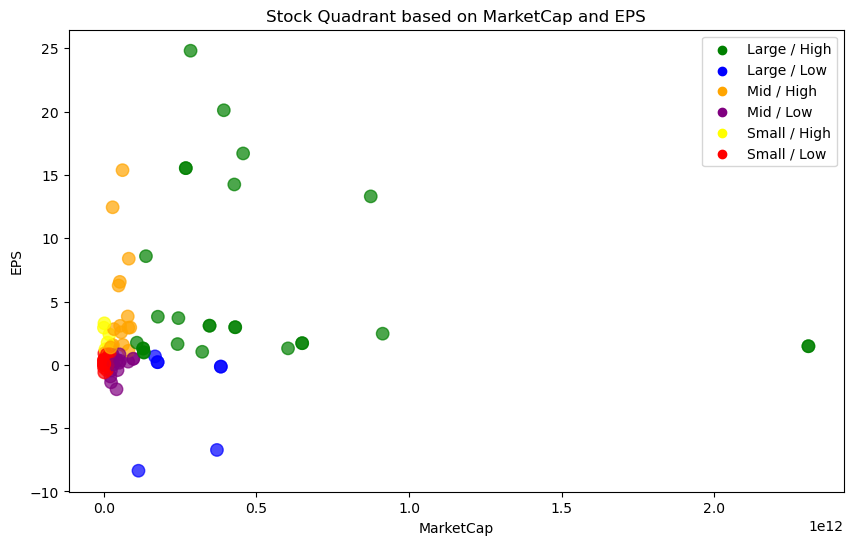

In [24]:

colors = {
    'Large / High':'green',
    'Large / Low':'blue',
    'Mid / High':'orange',
    'Mid / Low':'purple',
    'Small / High':'yellow',
    'Small / Low':'red'
}

plt.figure(figsize=(10,6))
plt.scatter(df['MarketCap'], df['EPS'], c=df['Quadrant'].map(colors), s=80, alpha=0.7)
plt.xlabel('MarketCap')
plt.ylabel('EPS')
plt.title('Stock Quadrant based on MarketCap and EPS')

# ใส่ Label Legend
for quadrant, color in colors.items():
    plt.scatter([], [], c=color, label=quadrant)
plt.legend()
plt.show()


---------


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
# 1️⃣ สร้างกลุ่ม MarketCap และ EPS
quantiles = df['MarketCap'].quantile([0.33, 0.66])
low_th = quantiles[0.33]
high_th = quantiles[0.66]

def marketcap_group(x):
    if x <= low_th:
        return 'Small'
    elif x <= high_th:
        return 'Mid'
    else:
        return 'Large'

df['MarketCap_group'] = df['MarketCap'].apply(marketcap_group)

median_eps = df['EPS'].median()
df['EPS_group'] = df['EPS'].apply(lambda x: 'High' if x >= median_eps else 'Low')

df['Quadrant'] = df['MarketCap_group'] + ' / ' + df['EPS_group']

In [65]:
# 2️⃣ เตรียม pivot table สำหรับ heatmap
pivot_data = df.pivot_table(
    index='MarketCap_group',
    columns='EPS_group',
    values='Symbol',
    aggfunc=lambda x: ', '.join(x)
).reindex(index=['Large', 'Mid', 'Small'], columns=['High', 'Low'])

# สร้าง matrix ของจำนวนหุ้นในแต่ละช่อง
count_matrix = df.groupby(['MarketCap_group', 'EPS_group']).size().unstack().fillna(0)
count_matrix = count_matrix.reindex(index=['Large', 'Mid', 'Small'], columns=['High', 'Low'])

c:\Users\a0864\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


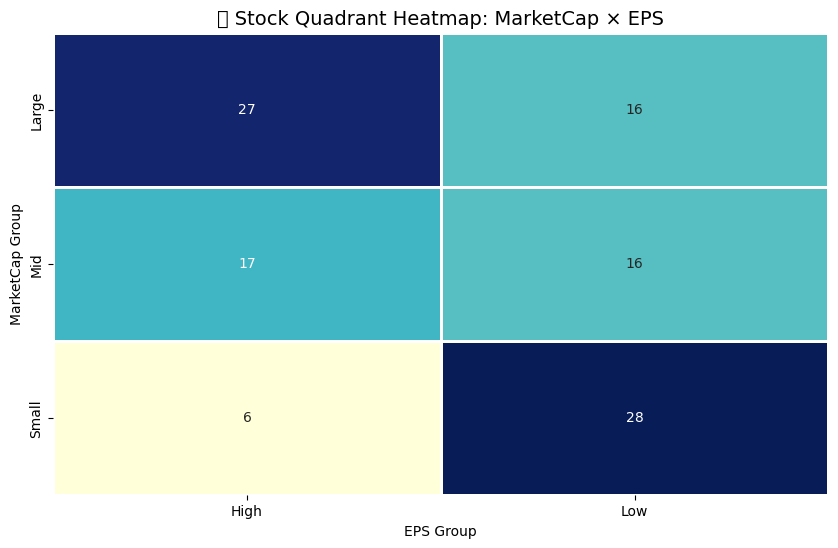

In [68]:
# 3️⃣ Plot Heatmap พร้อมชื่อหุ้น

plt.figure(figsize=(10, 6))
sns.heatmap(count_matrix, annot=True, fmt='.0f', cmap='YlGnBu', cbar=False, linewidths=2)
plt.title('📈 Stock Quadrant Heatmap: MarketCap × EPS', fontsize=14)
plt.xlabel('EPS Group')
plt.ylabel('MarketCap Group')
plt.show()

In [69]:
# 4️⃣ แสดงรายชื่อหุ้นในแต่ละ Quadrant
 
print("\n🧩 รายชื่อหุ้นในแต่ละ Quadrant:")
for mc in ['Large', 'Mid', 'Small']:
    for eps in ['High', 'Low']:
        stocks = df[(df['MarketCap_group'] == mc) & (df['EPS_group'] == eps)]
        symbols = ', '.join(stocks['Symbol'].tolist())
        print(f"▶ {mc} / {eps}: {symbols if symbols else '-'}")


🧩 รายชื่อหุ้นในแต่ละ Quadrant:
▶ Large / High: ADVANC.BK, AOT.BK, BDMS.BK, BH.BK, CPALL.BK, CPAXT.BK, CPF.BK, CPN.BK, DELTA.BK, GULF.BK, KBANK.BK, KTB.BK, MINT.BK, PTT.BK, PTTEP.BK, SCB.BK, SCC.BK, CRC.BK, BBL.BK, CPALL.BK, CRC.BK, DELTA.BK, GPSC.BK, GULF.BK, KTB.BK, MINT.BK, SCC.BK
▶ Large / Low: OR.BK, TRUE.BK, TTB.BK, DIF.BK, DTAC.BK, EPCO.BK, ESSO.BK, INTUCH.BK, JASIF.BK, PTTGC.BK, ROBINS.BK, STEC.BK, THAI.BK, TMB.BK, TRUE.BK, TTB.BK
▶ Mid / High: KTC.BK, AEONTS.BK, AP.BK, BA.BK, BJC.BK, CBG.BK, CK.BK, COM7.BK, EGCO.BK, KKP.BK, MTC.BK, RATCH.BK, SPALI.BK, TASCO.BK, TCAP.BK, TISCO.BK, TOP.BK
▶ Mid / Low: HMPRO.BK, BEM.BK, BANPU.BK, BCP.BK, BTS.BK, EA.BK, GLOBAL.BK, HANA.BK, HMPRO.BK, IRPC.BK, KCE.BK, OSP.BK, PLANB.BK, SIRI.BK, VGI.BK, WHA.BK
▶ Small / High: AMATA.BK, BUI.BK, GFPT.BK, JMT.BK, SABINA.BK, THIP.BK
▶ Small / Low: AAV.BK, ACAP.BK, AUCT.BK, BEC.BK, BWG.BK, CHG.BK, DOHOME.BK, ITD.BK, JAS.BK, KGI.BK, LPN.BK, OCC.BK, ORI.BK, PTG.BK, QH.BK, RS.BK, SAMART.BK, SAMTEL.BK, STA.BK

In [70]:
# 5️⃣ (เสริม) แสดงตาราง pivot หุ้น

print("\n📊 ตาราง pivot หุ้นแต่ละช่อง:")
display(pivot_data)



📊 ตาราง pivot หุ้นแต่ละช่อง:


EPS_group,High,Low
MarketCap_group,,
Large,"ADVANC.BK, AOT.BK, BDMS.BK, BH.BK, CPALL.BK, C...","OR.BK, TRUE.BK, TTB.BK, DIF.BK, DTAC.BK, EPCO...."
Mid,"KTC.BK, AEONTS.BK, AP.BK, BA.BK, BJC.BK, CBG.B...","HMPRO.BK, BEM.BK, BANPU.BK, BCP.BK, BTS.BK, EA..."
Small,"AMATA.BK, BUI.BK, GFPT.BK, JMT.BK, SABINA.BK, ...","AAV.BK, ACAP.BK, AUCT.BK, BEC.BK, BWG.BK, CHG...."


c:\Users\a0864\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


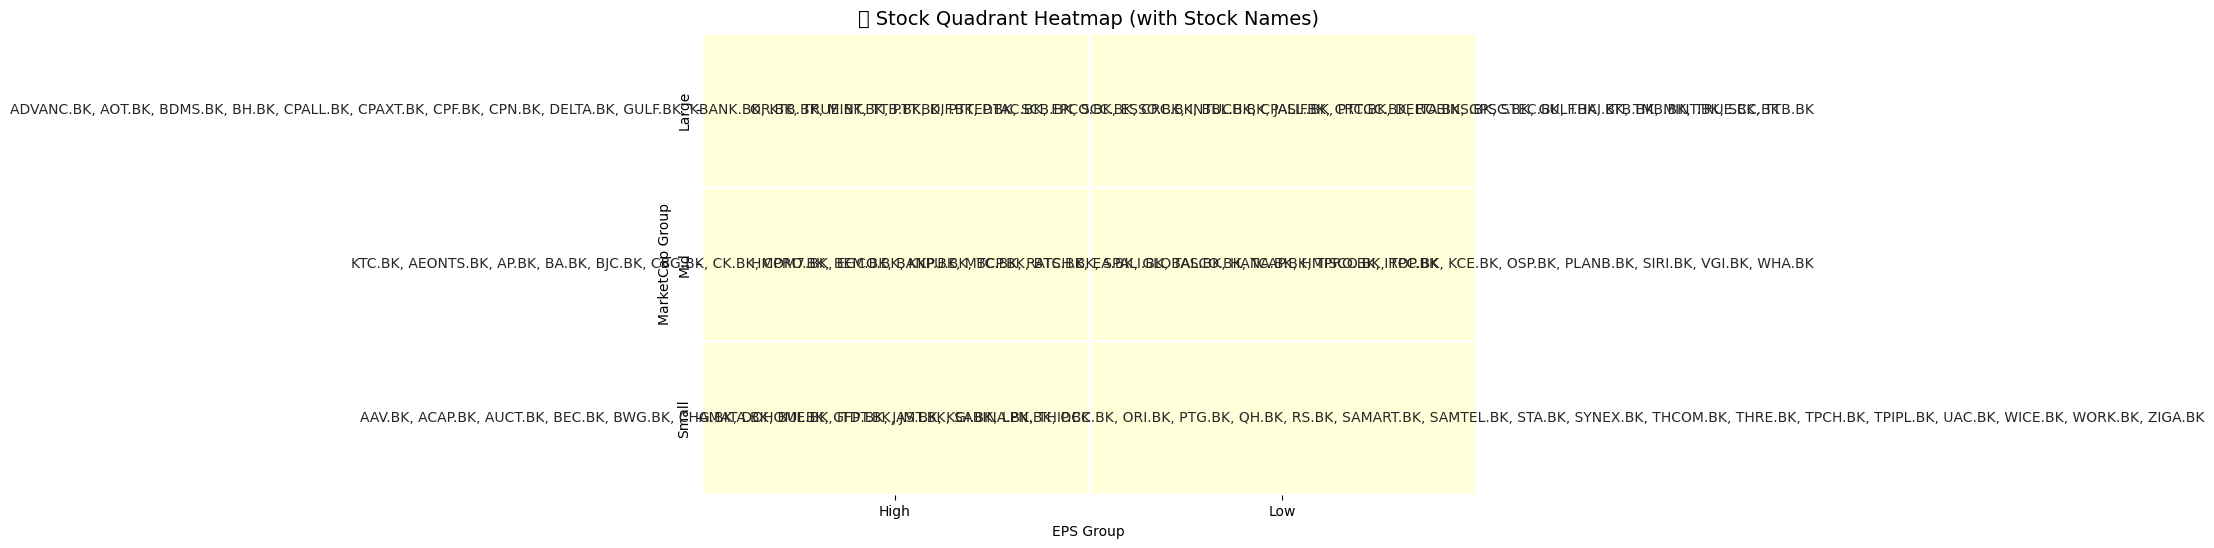

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(
    count_matrix*0,  # ทำเป็นตารางว่าง
    annot=pivot_data.fillna(''), 
    fmt='', 
    cmap='YlGnBu', 
    cbar=False, 
    linewidths=2
)
plt.title('📈 Stock Quadrant Heatmap (with Stock Names)', fontsize=14)
plt.xlabel('EPS Group')
plt.ylabel('MarketCap Group')
plt.show()


--------

 --- 5. ดูผลลัพธ์ DataFrame ---

In [25]:
type(df)


pandas.core.frame.DataFrame

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           110 non-null    object 
 1   CompanyName      103 non-null    object 
 2   MarketCap        101 non-null    float64
 3   PE               87 non-null     float64
 4   PBV              101 non-null    float64
 5   DividendYield    85 non-null     float64
 6   EPS              100 non-null    float64
 7   Volume           102 non-null    float64
 8   Sector           101 non-null    object 
 9   Industry         101 non-null    object 
 10  MarketCap_group  110 non-null    object 
 11  EPS_group        110 non-null    object 
 12  Quadrant         110 non-null    object 
dtypes: float64(6), object(7)
memory usage: 11.3+ KB


In [27]:
df

,Symbol,CompanyName,MarketCap,PE,PBV,DividendYield,EPS,Volume,Sector,Industry,MarketCap_group,EPS_group,Quadrant
0,ADVANC.BK,ADVANC_ADVANCED INFO SERVICE,8.744177e+11,22.105263,8.599508,4.74,13.30,4910232.0,Communication Services,Telecom Services,Large,High,Large / High
1,AOT.BK,AOT_AIRPORTS OF THAILAND,6.035708e+11,32.500000,4.754135,1.90,1.30,34084888.0,Industrials,Airports & Air Services,Large,High,Large / High
2,BDMS.BK,BDMS_BANGKOK DUSIT MEDICAL,3.226076e+11,19.708738,3.176839,3.77,1.03,53236003.0,Healthcare,Medical Care Facilities,Large,High,Large / High
3,BH.BK,BH_BUMRUNGRAD HOSPITAL,1.383238e+11,20.279720,4.828237,2.89,8.58,4799673.0,Healthcare,Medical Care Facilities,Large,High,Large / High
4,CPALL.BK,CPALL_CP ALL,4.305571e+11,16.245790,3.687146,2.83,2.97,34323416.0,Consumer Defensive,Grocery Stores,Large,High,Large / High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,VGI.BK,VGI_VGI,3.186294e+10,50.333336,0.876378,0.87,0.03,44325055.0,Industrials,Conglomerates,Mid,Low,Mid / Low
106,WHA.BK,WHA_WHA CORPORATION,5.350966e+10,11.187500,1.526002,5.35,0.32,101407118.0,Real Estate,Real Estate Services,Mid,Low,Mid / Low
107,WICE.BK,WICE_WICE LOGISTICS,1.897358e+09,29.600000,1.454545,4.73,0.10,866275.0,Industrials,Integrated Freight & Logistics,Small,Low,Small / Low
108,WORK.BK,WORK_WORKPOINT ENTERTAINMENT,1.872216e+09,NaN,0.448820,NaN,-0.60,135724.0,Communication Services,Entertainment,Small,Low,Small / Low


-------------------
ML Model
-------------------

------------------------
Import Libraries
------------------------

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

-------------------------------
1️⃣ Prepare Data
-------------------------------

In [48]:
features = ['MarketCap', 'PE', 'PBV', 'DividendYield', 'Volume']  # Properties
target = 'EPS'  # Target variable

df_clean = df[features + [target]].dropna()
X = df_clean[features]
y = df_clean[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


-------------------------------
2️⃣ Define Models & Descriptions
-------------------------------

In [49]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

model_descriptions = {
    'LinearRegression': "โมเดล Linear Regression แบบพื้นฐาน, สมมติว่าความสัมพันธ์ระหว่าง feature กับ target เป็นเชิงเส้น",
    'Ridge': "Linear Regression พร้อม L2 regularization, ลดปัญหา overfitting และ multicollinearity",
    'Lasso': "Linear Regression พร้อม L1 regularization, สามารถทำ feature selection ได้โดย shrink coefficient เป็นศูนย์",
    'RandomForest': "Ensemble model แบบ Random Forest, ประกอบด้วยหลาย decision trees และใช้การ average ผลลัพธ์, เหมาะกับ non-linear relationships",
    'GradientBoosting': "Ensemble model แบบ Gradient Boosting, สร้าง trees ตามลำดับเพื่อแก้ไข residual ของ tree ก่อนหน้า, มีประสิทธิภาพสูงใน regression",
    'SVR': "Support Vector Regression, ใช้ kernel trick เพื่อจับ pattern แบบ non-linear, ควบคุม margin ของ prediction"
}

-------------------------------
3️⃣ Evaluate Models
-------------------------------

In [50]:
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    re = (y_test - y_pred) / y_test
    mre = np.mean(np.abs(re))
    mare = np.mean(np.abs(re))  # same as MRE

    cv_r2 = np.mean(cross_val_score(model, X_scaled, y, cv=kf, scoring='r2'))
    
    results.append({
        'Model': name,
        'Description': model_descriptions.get(name, ""),
        'R2': r2,
        'CV_R2': cv_r2,
        'MAE': mae,
        'MRE': mre,
        'MARE': mare
    })

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("✅ Model Comparison Results:")
display(results_df)

✅ Model Comparison Results:


,Model,Description,R2,CV_R2,MAE,MRE,MARE
4,GradientBoosting,"Ensemble model แบบ Gradient Boosting, สร้าง tr...",0.733317,0.525271,1.511360,0.929932,0.929932
3,RandomForest,"Ensemble model แบบ Random Forest, ประกอบด้วยหล...",0.555909,-0.347154,2.324150,2.142040,2.142040
0,LinearRegression,"โมเดล Linear Regression แบบพื้นฐาน, สมมติว่าคว...",0.325409,-2.676972,3.678746,4.653597,4.653597
1,Ridge,"Linear Regression พร้อม L2 regularization, ลดป...",0.302698,-2.345825,3.703884,4.468136,4.468136
2,Lasso,"Linear Regression พร้อม L1 regularization, สาม...",-0.067174,-1.174802,4.502177,6.809475,6.809475
5,SVR,"Support Vector Regression, ใช้ kernel trick เพ...",-0.091713,-0.068956,3.760222,2.058046,2.058046


-------------------------------
4️⃣ Auto-Rank Top 3 Models
-------------------------------

🏆 Top 3 Models by R²: ['GradientBoosting', 'RandomForest', 'LinearRegression']


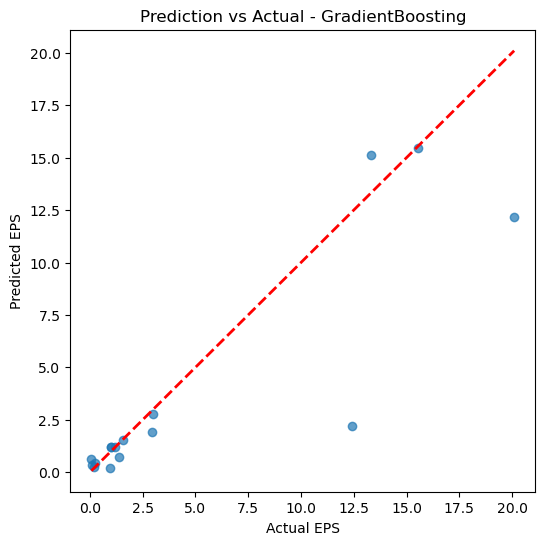

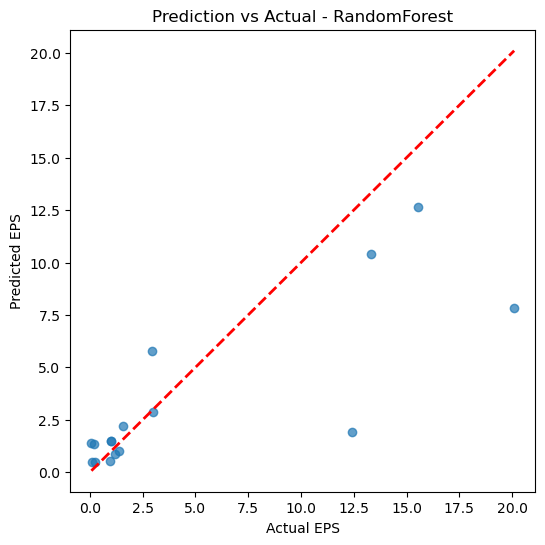

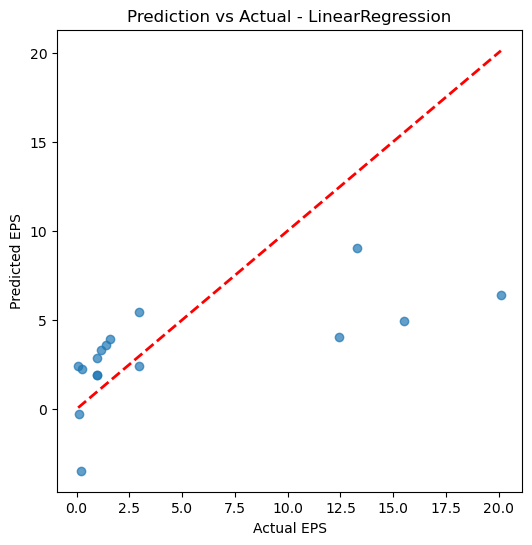

In [55]:
top3_models = results_df.head(3)['Model'].tolist()
print("🏆 Top 3 Models by R²:", top3_models)

for name in top3_models:
    model = models[name]
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual EPS")
    plt.ylabel("Predicted EPS")
    plt.title(f"Prediction vs Actual - {name}")
    plt.show()


-------------------------------
5️⃣ Feature Importance for Tree-Based Models
-------------------------------

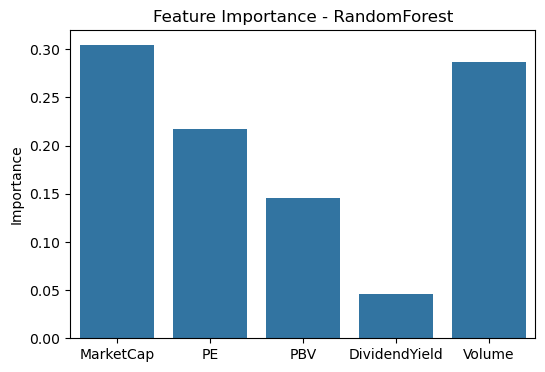

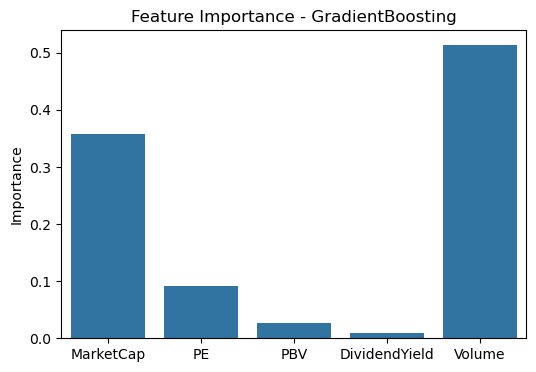

In [57]:
tree_models = ['RandomForest', 'GradientBoosting']
for name in tree_models:
    if name in top3_models:
        model = models[name]
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            plt.figure(figsize=(6,4))
            sns.barplot(x=features, y=importances)
            plt.title(f'Feature Importance - {name}')
            plt.ylabel('Importance')
            plt.show()

-------------------------------
6️⃣ Feature Summary & Distribution
-------------------------------

In [51]:
feature_summary = X.describe().T
correlation = X.corr()

print("\n✅ Feature Summary:")
display(feature_summary)
print("\n✅ Feature Correlation Matrix:")
display(correlation)

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


✅ Feature Summary:


,count,mean,std,min,25%,50%,75%,max
MarketCap,78.0,1.869215e+11,3.916304e+11,5.520000e+08,1.720921e+10,5.542188e+10,1.764827e+11,2.307656e+12
PE,78.0,1.785107e+01,1.965272e+01,4.539249e+00,8.995842e+00,1.385392e+01,1.876830e+01,1.258503e+02
PBV,78.0,2.744810e+00,5.289234e+00,2.573782e-01,7.211555e-01,1.077814e+00,2.313371e+00,2.841611e+01
DividendYield,78.0,5.396154e+00,4.265406e+00,1.300000e-01,2.867500e+00,4.735000e+00,6.805000e+00,2.839000e+01
Volume,78.0,2.432419e+07,5.036341e+07,7.160000e+02,3.423294e+06,1.049234e+07,2.397578e+07,3.096911e+08



✅ Feature Correlation Matrix:


,MarketCap,PE,PBV,DividendYield,Volume
MarketCap,1.000000,0.795412,0.773487,-0.227104,0.043581
PE,0.795412,1.000000,0.690707,-0.353916,-0.056830
PBV,0.773487,0.690707,1.000000,-0.181880,-0.063041
DividendYield,-0.227104,-0.353916,-0.181880,1.000000,-0.000799
Volume,0.043581,-0.056830,-0.063041,-0.000799,1.000000


-------------------------------
7️⃣ Plot Feature Distributions
-------------------------------

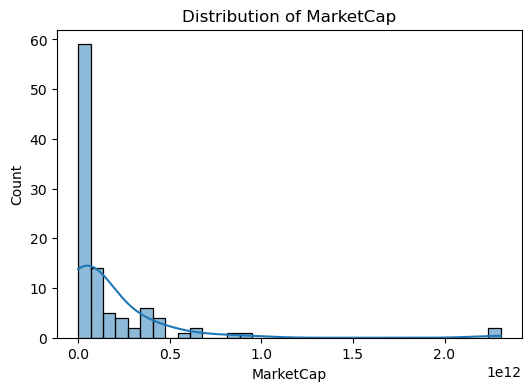

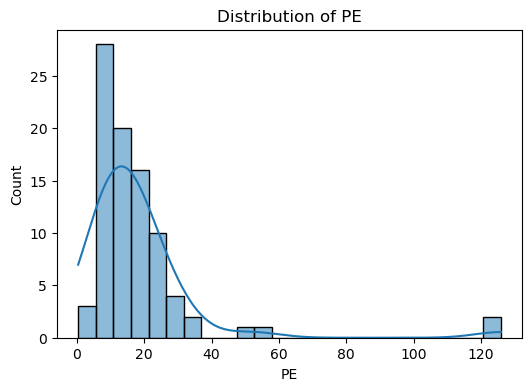

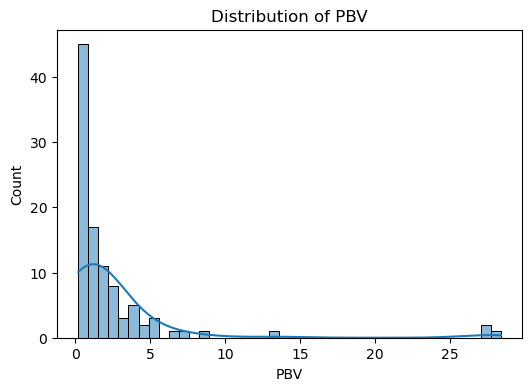

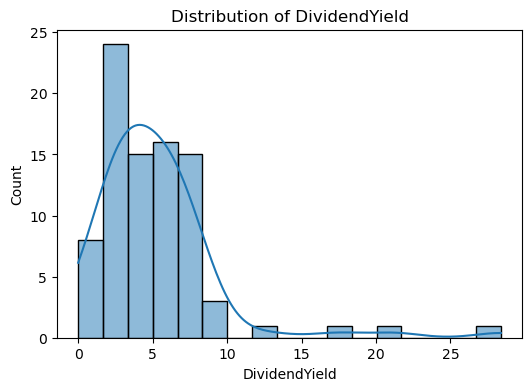

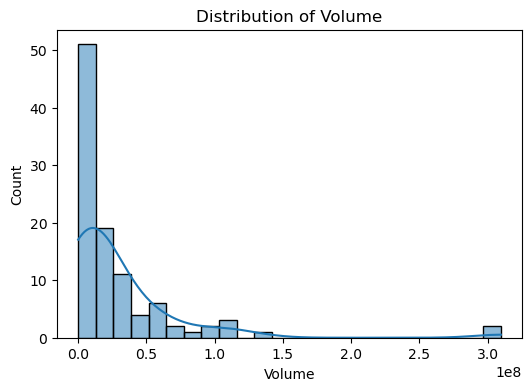

In [53]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

--------------


-------------------------------
8️⃣ Feature Importance for Tree-Based Models
-------------------------------

In [58]:
with pd.ExcelWriter("ML_Model_Comparison_Top3.xlsx") as writer:
    results_df.to_excel(writer, sheet_name="Model_Results", index=False)
    feature_summary.to_excel(writer, sheet_name="Feature_Summary")
    correlation.to_excel(writer, sheet_name="Feature_Correlation")

print("💾 Exported results to ML_Model_Comparison_Top3.xlsx")

💾 Exported results to ML_Model_Comparison_Top3.xlsx
